<a href="https://colab.research.google.com/github/azadm4h-crypto/Super-store-Assignment-/blob/main/Superstore_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
# Upload your Superstore CSV from your computer
from google.colab import files
uploaded = files.upload()

# Reading the file
df = pd.read_csv(list(uploaded.keys())[0], encoding='latin1')
df.head()


Saving Sample_-_Superstore[1].csv to Sample_-_Superstore[1].csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# 3. Basic Information
print("Shape of Data:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape of Data: (9994, 21)

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Data Types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship M

In [ ]:
# 4. Data Cleaning
# Drop duplicates
df = df.drop_duplicates()

# Convert date columns if available
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"])

if "Ship Date" in df.columns:
    df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Fill missing numeric data with 0
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Fill missing text columns with 'Unknown'
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# 5. Statistical Summary
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


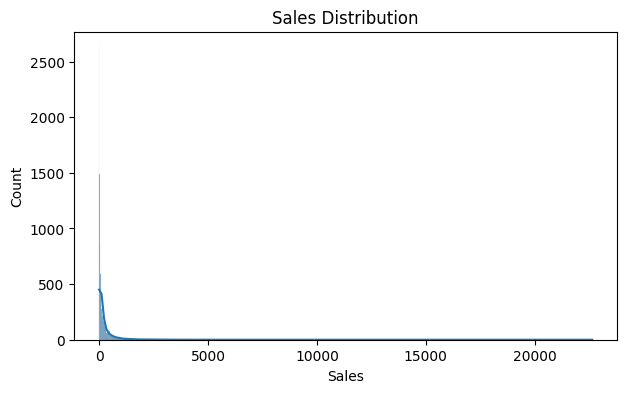

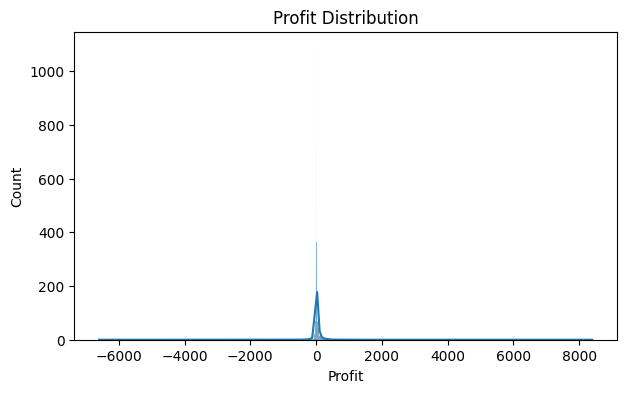

In [ ]:
# 6. Simple Data Distributions
# Sales distribution
plt.figure(figsize=(7,4))
sns.histplot(df["Sales"], kde=True)
plt.title("Sales Distribution")
plt.show()

# Profit distribution
plt.figure(figsize=(7,4))
sns.histplot(df["Profit"], kde=True)
plt.title("Profit Distribution")
plt.show()

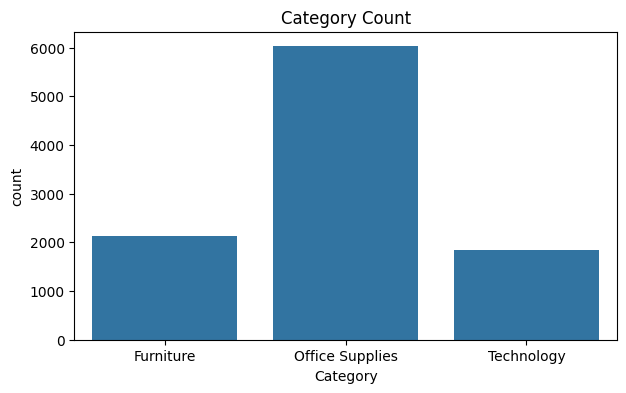

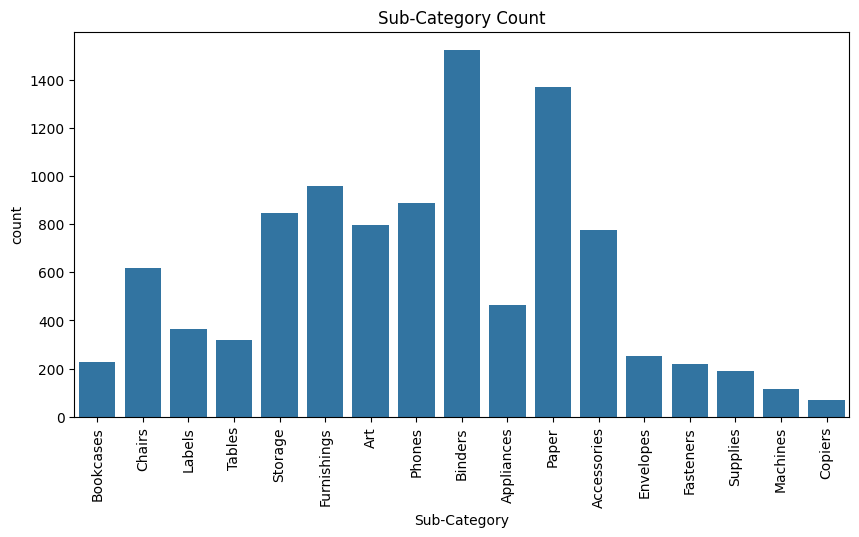

In [ ]:
# 7. Categorical Distributions
# Category count
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Category")
plt.title("Category Count")
plt.show()

# Sub-Category count
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Sub-Category")
plt.title("Sub-Category Count")
plt.xticks(rotation=90)
plt.show()

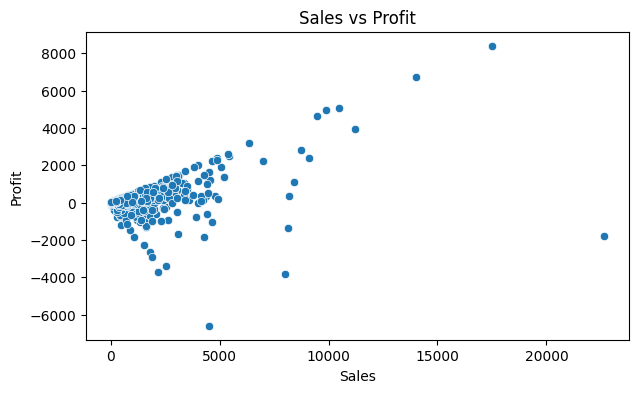

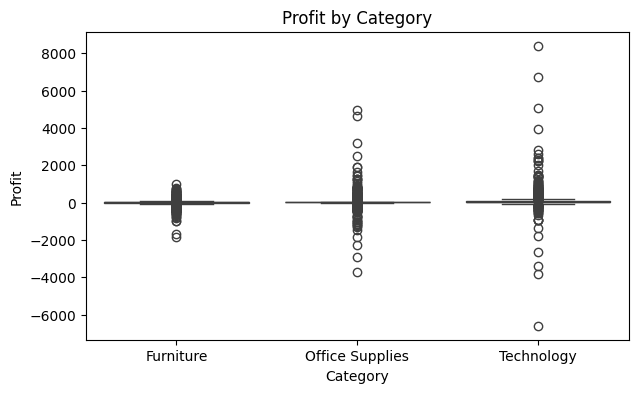

In [ ]:
# 8. EDA (Basic Graphs)
# Sales vs Profit
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="Sales", y="Profit")
plt.title("Sales vs Profit")
plt.show()

# Boxplot → Profit per Category
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Category", y="Profit")
plt.title("Profit by Category")
plt.show()

In [ ]:
# 9. Simple Group Analysis
# Sales by Category
sales_cat = df.groupby("Category")["Sales"].sum()
print("Sales by Category:\n", sales_cat, "\n")

# Profit by State
if "State" in df.columns:
    profit_state = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)
    print("Top 10 States by Profit:\n", profit_state)

Sales by Category:
 Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64 

Top 10 States by Profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


In [ ]:
# 10. Final Quick Insights (Student Level)
print("Total Sales:", df["Sales"].sum())
print("Total Profit:", df["Profit"].sum())
print("Most Common Category:", df["Category"].mode()[0])

if "Region" in df.columns:
    print("Most Common Region:", df["Region"].mode()[0])

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Most Common Category: Office Supplies
Most Common Region: West


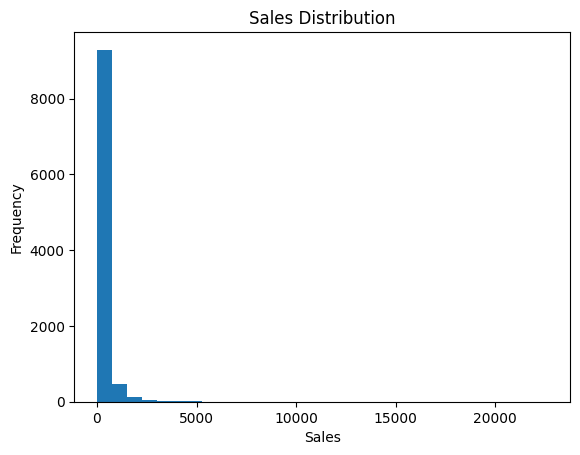

In [ ]:
plt.hist(df['Sales'], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

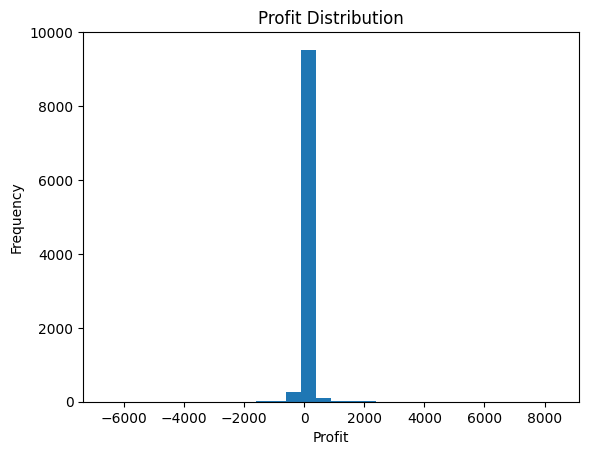

In [ ]:
plt.hist(df['Profit'], bins=30)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

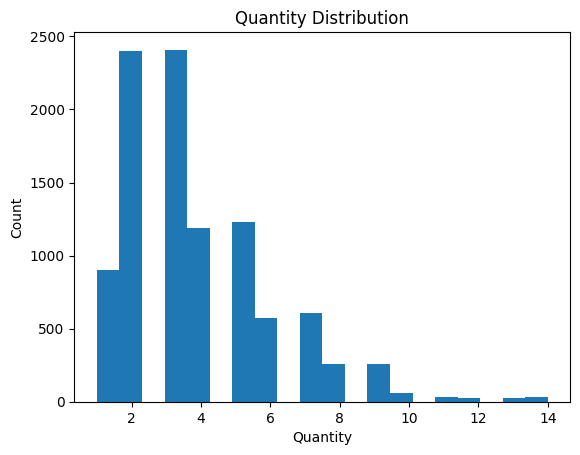

In [ ]:
plt.hist(df['Quantity'], bins=20)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

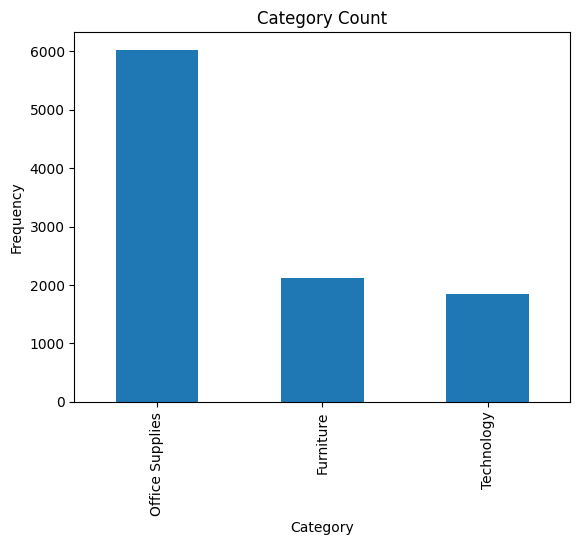

In [ ]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Category Count")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

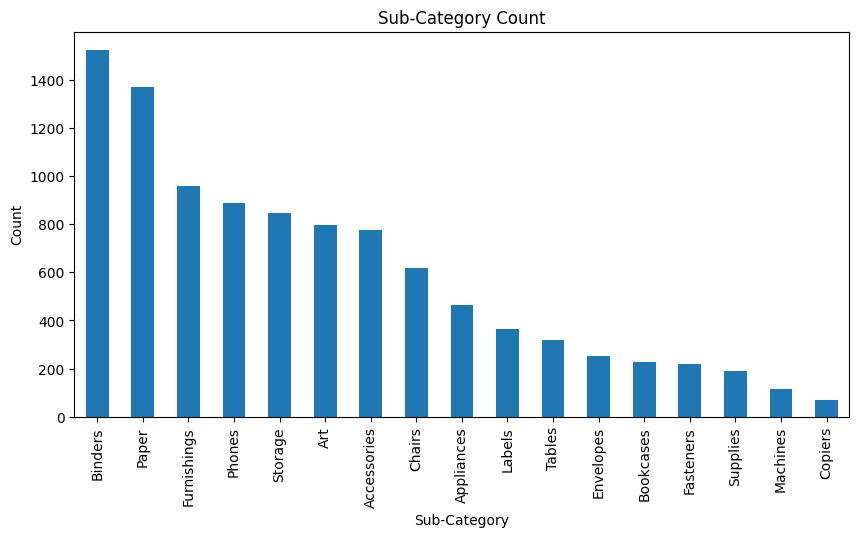

In [ ]:
df['Sub-Category'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Sub-Category Count")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [ ]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
df[['Sales', 'Profit', 'Quantity']].agg(['min', 'max'])

,Sales,Profit,Quantity
min,0.444,-6599.978,1
max,22638.480,8399.976,14


In [ ]:
df[['Sales', 'Profit', 'Quantity']].mean()

,0
Sales,229.858001
Profit,28.656896
Quantity,3.789574


In [ ]:
df[['Sales', 'Profit', 'Quantity']].median()

,0
Sales,54.4900
Profit,8.6665
Quantity,3.0000


In [ ]:
df[['Sales', 'Profit', 'Quantity']].std()

,0
Sales,623.245101
Profit,234.260108
Quantity,2.225110


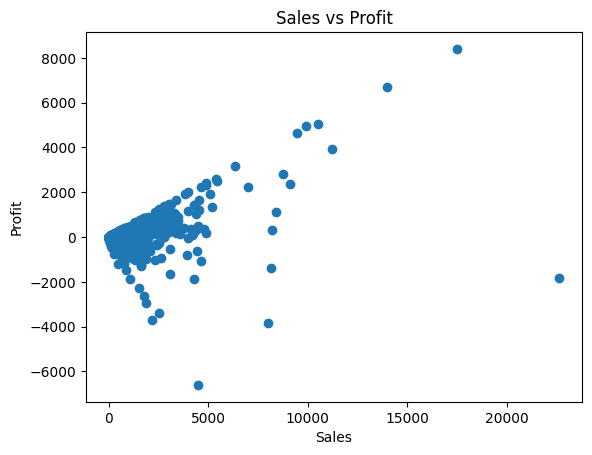

In [ ]:
plt.scatter(df['Sales'], df['Profit'])
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

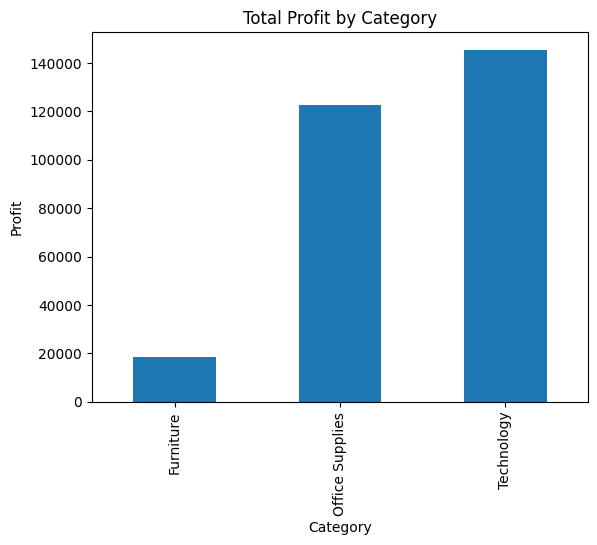

In [ ]:
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

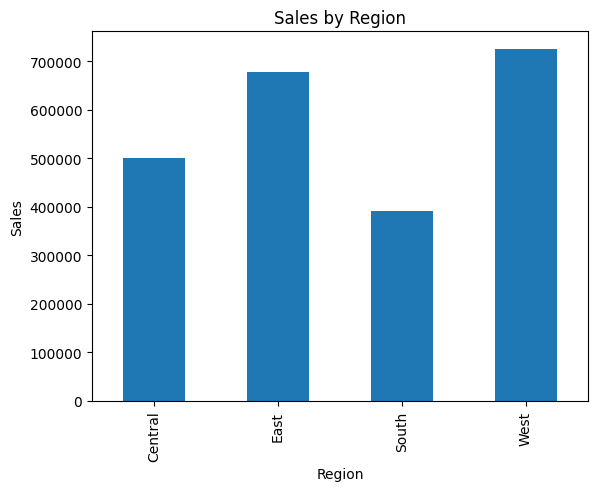

In [ ]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

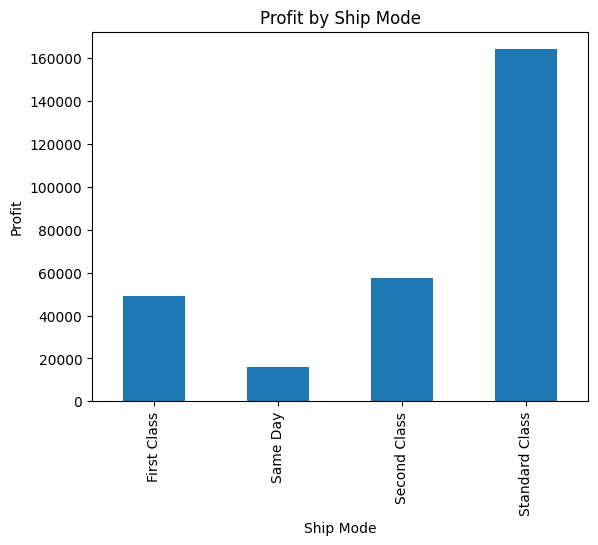

In [ ]:
df.groupby('Ship Mode')['Profit'].sum().plot(kind='bar')
plt.title("Profit by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

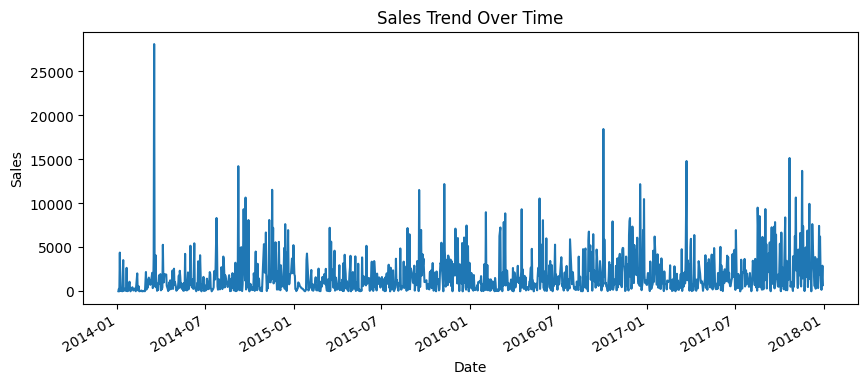

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.groupby('Order Date')['Sales'].sum().plot(figsize=(10,4))
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

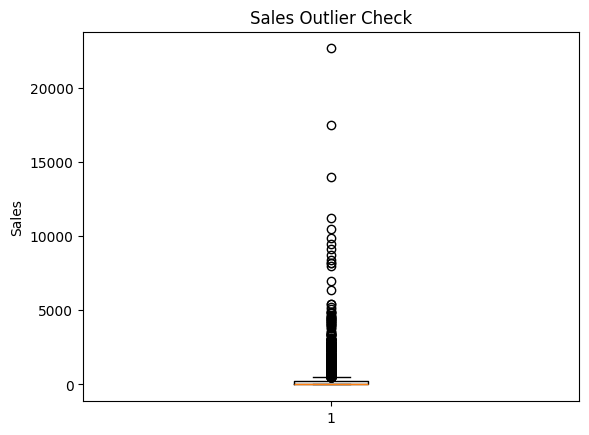

In [ ]:
plt.boxplot(df['Sales'])
plt.title("Sales Outlier Check")
plt.ylabel("Sales")
plt.show()

# Final Report / Insights
Task 8: Final Report / Insights

After completing all the previous tasks—cleaning the data, checking summaries, and performing EDA—here are the main insights I found from the dataset:

1. Sales and Profit Relationship

- Sales and profit do not always increase together.

- Some products have high sales but very low or even negative profit.

This means certain items might be sold with small margins or discounts.

2. Performance of Product Categories

- Technology and Office Supplies show good overall profit.

- Furniture has lower profit compared to the other categories.

- This helps identify which product areas are strong or weak.

3. Regional Sales Differences

- Sales are not equal across all regions.

- Some regions perform much better, showing higher customer demand.

- This can help the business understand where it should focus more.

4. Effect of Ship Mode on Profit

- Different shipping methods lead to different levels of profit.

- Faster shipping may cost more, reducing overall profit in some cases.

5. Trend Over Time

- Sales vary over time, showing some high-selling periods.

- This means the business might experience seasonal patterns.

6. Outliers in Sales

- There are some unusually high sales values.

- These could be bulk orders or large corporate purchases.

##Final Summary

Overall, the dataset shows that business performance depends on many factors such as category, region, and shipping method. Not all high sales lead to high profit, and some areas may need improvement. This analysis helps understand where the company is doing well and where there is room for better performance.

In [ ]:
df.to_csv("clean_superstore.csv", index=False)

In [ ]:
from google.colab import files
files.download("clean_superstore.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>